<a href="https://colab.research.google.com/github/jpabonl/Mecanica_cuantica_I/blob/main/TallerMC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Los siguientes codigos muestran graficamente el comportamiento de una función de onda dada, dependiente de la posición y el tiempo, asi como su distribución de probabilidad, para varios n.***

---





La funcion a graficar es:

$\sum_{n=1}^{\infty }-\frac{4(15)^{1/2}((-1)^{n}-1)}{\pi^{3}n^{3}}(\frac{2}{a})^{\frac{1}{2}}sin(\frac{n\pi x}{a})e^{-i(\frac{n^{2}\pi^{2}\hbar}{2ma^{2}}t)}$



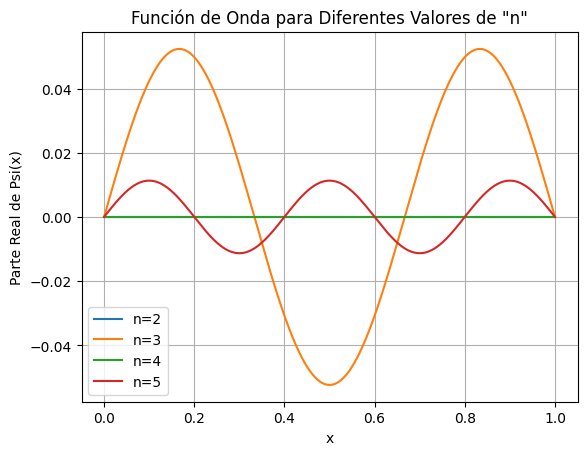

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 1.0
# Para ser mas eficientes, se trabaja en unidades naturales
hbar = 1.0
m = 1.0
x = np.linspace(0, a, 1000)
t = 0.0
n_values = [2, 3, 4, 5]

# Función de onda
def wave_function(x, t, n):
    prefactor = -4 * (15**0.5) * ((-1)**n - 1) / (np.pi**3 * n**3)
    psi_x = prefactor * (2/a)**0.5 * np.sin(n * np.pi * x / a) * np.exp(-1j * (n**2 * np.pi**2 * hbar / (2 * m * a**2) * t))
    return psi_x

# Graficar la función de onda para diferentes valores de n
for n in n_values:
    psi_x = wave_function(x, t, n)
    plt.plot(x, np.real(psi_x), label=f'n={n}')

plt.title('Función de Onda para Diferentes Valores de n')
plt.xlabel('x')
plt.ylabel('Parte Real de Psi(x)')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

#Parámetros
a = 1.0
# Para ser mas eficientes, se trabaja en unidades naturales
hbar = 1.0
m = 1.0
t_max = 5.0
num_puntos_t = 500
x_max = a
num_puntos_x = 500

#Función de onda
def funcion_de_onda(x, t, n):
    coeficiente = -4 * (15 ** 0.5) * ((-1) ** n - 1) / (np.pi ** 3 * n ** 3) * (2 / a) ** 0.5
    fase = -1j * (n ** 2 * np.pi ** 2 * hbar) / (2 * m * a ** 2) * t
    psi = coeficiente * np.sin(n * np.pi * x / a) * np.exp(fase)
# Se normaliza la función para que la probabilidad vaya hasta 1
    norm = np.trapz(np.abs(psi) ** 2, x)
    return psi / np.sqrt(norm)

# Crea una cuadrícula de valores de x y t
x_values = np.linspace(0, x_max, num_puntos_x)
t_values = np.linspace(0, t_max, num_puntos_t)

X, T = np.meshgrid(x_values, t_values)

# Función para actualizar la gráfica con el valor de n seleccionado
def update_grafica(n):
    psi = funcion_de_onda(X, T, n)

    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(psi) ** 2, extent=[0, x_max, 0, t_max], origin='lower', aspect='auto')
    plt.colorbar(label='|\u03C8(x, t)|^2')
    plt.xlabel('Posición (x)')
    plt.ylabel('Tiempo (t)')
    plt.title(f'Función de Onda Normalizada para n = {n}')
    plt.show()

# Crea un control deslizante para n
n_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='n')
interact(update_grafica, n=n_slider)


interactive(children=(IntSlider(value=1, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.update_grafica(n)>

# **Si la distribución de probabilidad no se ve, abrir en collab ***